# Notebook to Calculate RAV

In [1]:
import os
import shutil
import zipfile
import tarfile
import urllib
import requests
from pathlib import Path
from tqdm import tqdm
import h5py as h5

In [2]:
import numpy as np
import awkward as ak
import uproot
import vector
vector.register_awkward()

In [3]:
import matplotlib.pyplot as plt

In [4]:
import torch

/Users/billyli/miniforge_x86_new/envs/weaver/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
root_dir = Path("/Users/billyli/scope/JetClass/minimal")
list(root_dir.glob('*.root'))

[PosixPath('/Users/billyli/scope/JetClass/minimal/HToCC_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/WToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZToQQ_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToBB_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToGG_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW2Q1L_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBarLep_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/TTBar_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/ZJetsToNuNu_120.root'),
 PosixPath('/Users/billyli/scope/JetClass/minimal/HToWW4Q_120.root')]

In [6]:
f = list(root_dir.glob('*.root'))[0]
f.name.split('_')

['HToCC', '120.root']

In [7]:
example_file_path = "/Users/billyli/scope/JetClass/minimal/HtoBB_120.root"

In [8]:
# data fraction for each file:
data_fraction = 3e-3

## Get Jet Mass from Root Files

In [9]:
def feature_to_numpy(tree, feature):
    return tree[feature].arrays().to_numpy().astype(float)

In [ ]:
jet_sdmass = {}
for f in root_dir.glob('*.root'):
    process = f.name.split('_')[0]
    tree = uproot.open(f)['tree']

    n_entries = tree.num_entries
    n_keep = int(n_entries * data_fraction)

    jet_sdmass[process] = tree["jet_sdmass"].array(
        entry_stop=n_keep,  # only read first fraction
        library="np"
    ).astype("double")
print(list(tree.keys()))

['part_px', 'part_py', 'part_pz', 'part_energy', 'part_deta', 'part_dphi', 'part_d0val', 'part_d0err', 'part_dzval', 'part_dzerr', 'part_charge', 'part_isChargedHadron', 'part_isNeutralHadron', 'part_isPhoton', 'part_isElectron', 'part_isMuon', 'label_QCD', 'label_Hbb', 'label_Hcc', 'label_Hgg', 'label_H4q', 'label_Hqql', 'label_Zqq', 'label_Wqq', 'label_Tbqq', 'label_Tbl', 'jet_pt', 'jet_eta', 'jet_phi', 'jet_energy', 'jet_nparticles', 'jet_sdmass', 'jet_tau1', 'jet_tau2', 'jet_tau3', 'jet_tau4', 'aux_genpart_eta', 'aux_genpart_phi', 'aux_genpart_pid', 'aux_genpart_pt', 'aux_truth_match']


In [11]:
jet_sdmass

{'HToCC': array([115.258255  , 111.84100342, 125.46985626, 121.42021179,
        120.83573151, 105.49179077,  43.27826309, 139.06036377,
        122.40354156,  28.71712875, 120.80971527, 128.69924927,
        123.87030792, 127.06275177, 124.07928467,  43.91745758,
        130.81384277,  60.36819458, 131.59205627, 113.32038116,
        119.39663696,  15.33431911, 118.13947296,  64.38430023,
        113.89389038,   7.75089788, 170.66763306, 133.01330566,
        152.081604  , 113.29091644,  76.84391022, 126.60312653,
        106.56745148,  69.94907379, 105.56674957, 127.30182648,
         54.91100311, 113.92726135, 126.84761047,  53.95689392,
        121.25402069, 108.84143066, 124.27698517, 126.14291382,
        113.63883972, 123.96975708, 131.51089478, 116.2822113 ,
        133.83558655, 123.94340515, 113.61911774, 110.66861725,
        138.56768799, 117.29775238, 123.20516968,  36.26975632,
        123.2926178 ,   4.2490778 , 109.03403473, 103.24626923,
        125.18728638, 118.44991

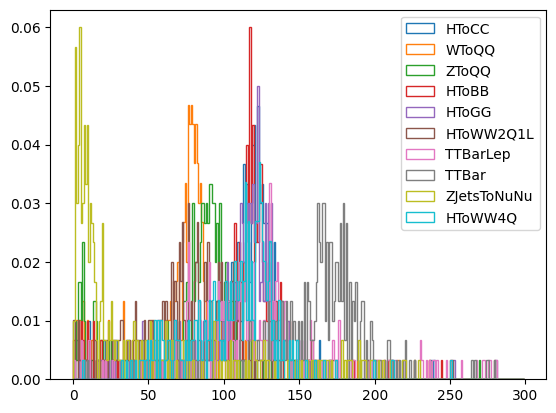

In [12]:
for k, v in jet_sdmass.items():
    plt.hist(v, label=k, bins=np.arange(0, 300, 1), density=True, histtype='step')
plt.legend()

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00333333, 0.        , 0.00333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00333333, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00666667,
        0.        , 0.        , 0.        , 0.  

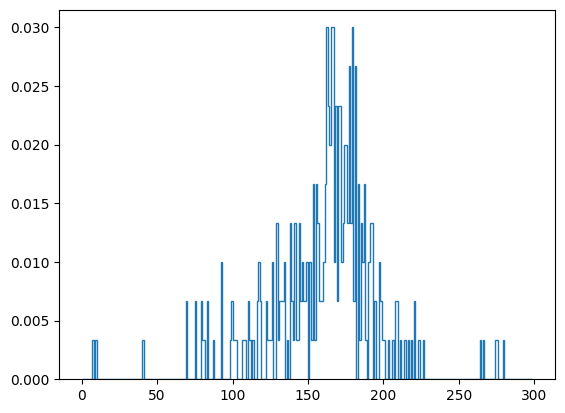

In [13]:
plt.hist(jet_sdmass['TTBar'], label='TTBar', bins=np.arange(0, 300, 1), density=True, histtype='step')

In [14]:
jet_sdmass.keys()

dict_keys(['HToCC', 'WToQQ', 'ZToQQ', 'HToBB', 'HToGG', 'HToWW2Q1L', 'TTBarLep', 'TTBar', 'ZJetsToNuNu', 'HToWW4Q'])

In [15]:
len(jet_sdmass['ZJetsToNuNu'])

300

## Load the last class token

In [16]:
file = h5.File('/Users/billyli/scope/weaver-core/frac_3e-3.h5', 'r')

In [17]:
X = np.array(file['hidden_10'][:]).astype('float').squeeze(1)
print(X.shape, X.mean(axis=1), X.std(axis=1), X.dtype)

(3000, 128) [ 2.33712868  0.3182264   0.17937937 ...  0.17867706  0.9416515
 -0.07674761] [19.7748777  15.53458895 15.71584237 ... 14.00250027 19.20917268
 16.73535399] float64


## Linear Regression to get the coefficient vector

In [18]:
jet_sdmass_all_list = list(jet_sdmass.values())
jet_sdmass_all_list = [x[..., np.newaxis] for x in jet_sdmass_all_list]
jet_sdmass_all = np.concatenate(jet_sdmass_all_list, axis=0)
y_tensor = torch.tensor(jet_sdmass_all)

In [19]:
X_tensor = torch.tensor(X)
X_tensor = torch.cat([X_tensor, torch.ones(X_tensor.size(0), 1)], dim=1)

In [20]:
print(y_tensor.dtype, X_tensor.dtype)

torch.float64 torch.float64


In [21]:
w_tensor = torch.linalg.pinv(X_tensor.T @ X_tensor) @ (X_tensor.T @ y_tensor)
noramlized_w = w_tensor[:-1] / torch.norm(w_tensor[:-1])

In [22]:
noramlized_w

tensor([[-5.3890e-02],
        [ 9.9804e-02],
        [ 6.6716e-03],
        [ 3.9478e-02],
        [-7.9683e-02],
        [-1.2420e-01],
        [-2.8910e-01],
        [-1.4961e-01],
        [-4.9660e-02],
        [ 7.1197e-02],
        [ 9.3718e-02],
        [ 2.1569e-02],
        [-1.4657e-01],
        [-5.3420e-02],
        [ 1.3870e-01],
        [ 4.6722e-02],
        [ 1.7714e-03],
        [ 2.2038e-02],
        [ 4.3541e-03],
        [ 3.1198e-03],
        [-1.1438e-02],
        [-8.9343e-02],
        [ 8.0683e-02],
        [-5.9909e-02],
        [-4.2337e-03],
        [-3.5295e-02],
        [-2.2144e-01],
        [ 1.9470e-02],
        [ 1.3875e-02],
        [ 1.8898e-01],
        [-1.6006e-01],
        [-5.5299e-02],
        [-1.7945e-01],
        [ 4.2465e-02],
        [ 1.3534e-02],
        [-1.8232e-01],
        [ 4.8150e-02],
        [ 4.7691e-02],
        [-2.1472e-02],
        [-2.0179e-02],
        [ 9.5827e-02],
        [-4.1576e-02],
        [ 4.5434e-02],
        [ 5

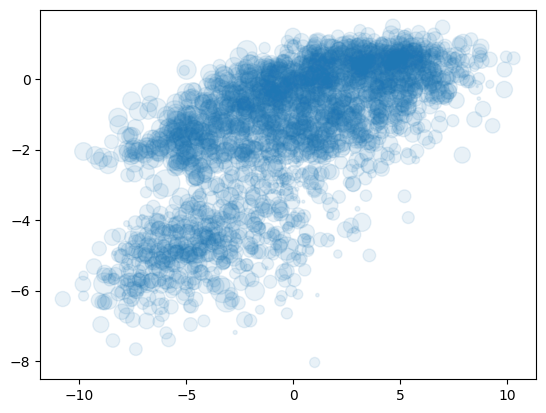

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=y_tensor, alpha=0.1)
# def func(x, w):
#     return x * w[0] / w[1]
# plt.scatter(X[:, 0], func(X[:, 0], w_tensor.numpy()), color='red')

In [24]:
len(jet_sdmass_all_list)

10

In [25]:
with h5.File("rav_sdmass_frac_3e-3.h5", 'w') as f:
    f.create_dataset('RAV_jet_sdmass', data=noramlized_w.cpu().numpy())

In [26]:
str(data_fraction)

'0.003'

In [27]:
vec1 = h5.File("rav_sdmass_frac_3e-3.h5", 'r')['RAV_jet_sdmass'][:]
vec2 = h5.File("rav_sdmass_frac_3e-2.h5", 'r')['RAV_jet_sdmass'][:]

In [31]:
(vec1*vec1).sum()

1.0000000000000002

In [32]:
(vec2*vec2).sum()

1.0

In [33]:
(vec1*vec2).sum()

0.7023578920217541

In [34]:
vec1.shape

(128, 1)